In [2]:
import numpy as np

In [3]:
class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0: 'UP',
            1: 'DOWN',
            2: 'LEFT',
            3: 'RIGHT',
        }

        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.start_state = (2, 0)
        self.agent_state = self.start_state

    @property
    def height(self):
        return len(self.reward_map)
    
    @property
    def width(self):
        return len(self.reward_map[0])
    
    @property
    def shape(self):
        return self.reward_map.shape
    
    def actions(self):
        return self.action_space
    
    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map(action)
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height: #out of boundry
            next_state = state
        elif next_state == self.wall_state: #if it is a wall
            next_state = state
        
        return next_state
    
    def reward(self, state, action, next_state):
        return self.reward_map(next_state)


In [4]:
# if '__file__' in globals():
#     import os, sys
#     sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
from collections import defaultdict
from dezerogym.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)

state = (1, 2)
print(V[state])

0


In [5]:
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})

state = (0, 1)
print(pi[state])

{0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}


In [6]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            new_V += action_prob * (r + gamma * V[next_state])

        V[state] = new_V
    return V

In [7]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)

        delta = 0
        for state in V.keys():
            tmp = abs(V[state] - old_V[state])
            if delta < tmp:
                delta = tmp

        if delta < threshold:
            break
    return V

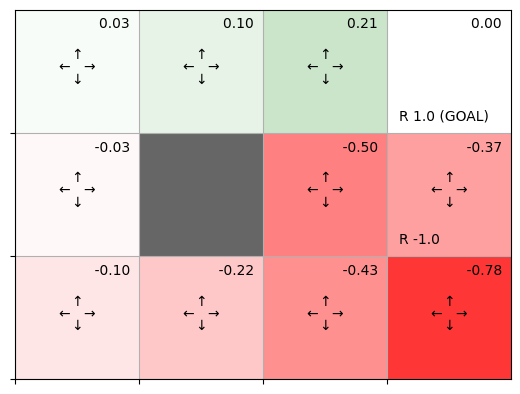

In [8]:
env = GridWorld()
gamma = 0.9
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

In [9]:
def argmax(d):
    max_value = max(d.values())
    max_key = 0
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

In [11]:
def greedy_policy(V, env, gamma):
    pi = dict()

    for state in env.states():
        action_values = dict()

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value
        
        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs

    return pi

In [12]:
def policy_iter(env, gamma, threshold=0.001, is_render=False):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)
        new_pi = greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:
            break
        pi = new_pi

    return pi

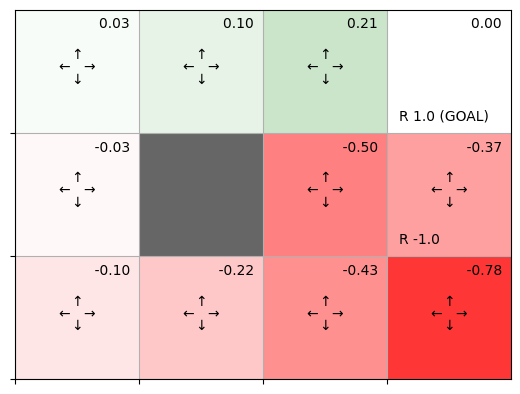

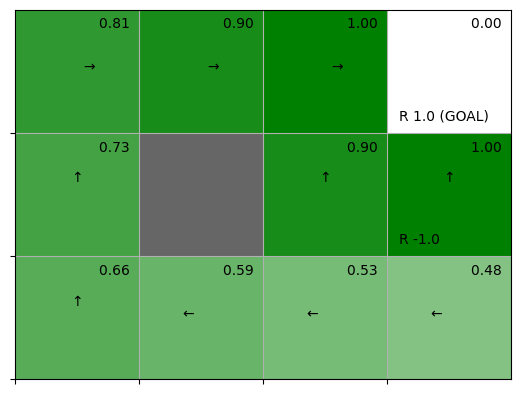

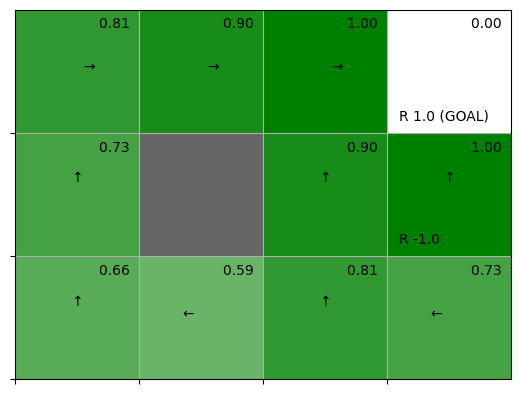

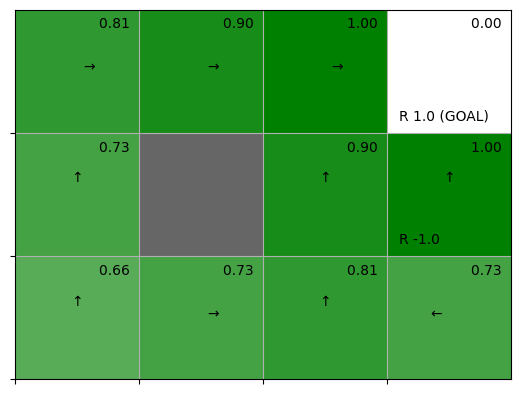

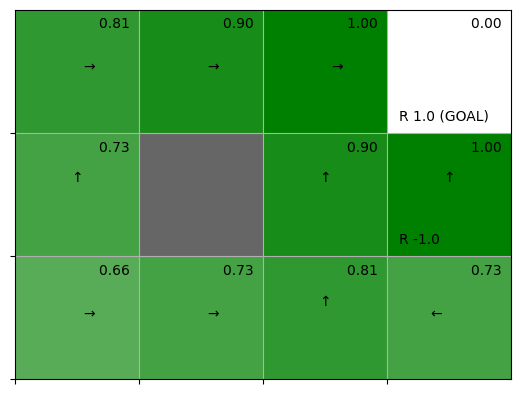

In [15]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma, is_render=True)